In [99]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
game_df = pd.read_csv("games.csv")
game_df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [10]:
game_df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [11]:
top_scores_df = game_df.sort_values(by="Metacritic score", ascending=False)
top_scores_df = top_scores_df[(top_scores_df["Metacritic score"])>0]
top_scores_df[["Name","Metacritic score","Positive","Negative"]]

,Name,Metacritic score,Positive,Negative
64935,Persona 5 Royal,97,3588,102
45752,Disco Elysium - The Final Cut,97,55250,3244
49557,Half-Life,96,73346,2619
36775,Half-Life 2,96,142368,3687
57205,Grand Theft Auto V,96,1171197,210154
...,...,...,...,...
30992,Rogue Warrior,29,782,388
11029,Fray: Reloaded Edition,27,1,49
31022,Postal III,24,1063,1749
5410,Flatout 3: Chaos & Destruction,23,506,2647


In [39]:
top_scores_df.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64
Recommendati

In [14]:
#metascore by genre
steam_tags_onehot_df = top_scores_df['Genres'].str.split(",").str.join('|').str.get_dummies()
big_genre_df = steam_tags_onehot_df.join(top_scores_df)

action_df = big_genre_df.groupby(big_genre_df["Action"])["Metacritic score"].mean()
adventure_df = big_genre_df.groupby(big_genre_df["Adventure"])["Metacritic score"].mean()
casual_df = big_genre_df.groupby(big_genre_df["Casual"])["Metacritic score"].mean()
eacess_df = big_genre_df.groupby(big_genre_df["Early Access"])["Metacritic score"].mean()
free_df = big_genre_df.groupby(big_genre_df["Free to Play"])["Metacritic score"].mean()
gore_df = big_genre_df.groupby(big_genre_df["Gore"])["Metacritic score"].mean()
indie_df = big_genre_df.groupby(big_genre_df["Indie"])["Metacritic score"].mean()
multi_df = big_genre_df.groupby(big_genre_df["Massively Multiplayer"])["Metacritic score"].mean()
nude_df = big_genre_df.groupby(big_genre_df["Nudity"])["Metacritic score"].mean()
rpg_df = big_genre_df.groupby(big_genre_df["RPG"])["Metacritic score"].mean()
race_df = big_genre_df.groupby(big_genre_df["Racing"])["Metacritic score"].mean()
sex_df = big_genre_df.groupby(big_genre_df["Sexual Content"])["Metacritic score"].mean()
sim_df = big_genre_df.groupby(big_genre_df["Simulation"])["Metacritic score"].mean()
sport_df = big_genre_df.groupby(big_genre_df["Sports"])["Metacritic score"].mean()
strat_df = big_genre_df.groupby(big_genre_df["Strategy"])["Metacritic score"].mean()
vio_df = big_genre_df.groupby(big_genre_df["Violent"])["Metacritic score"].mean()

print(action_df)
print(adventure_df)
print(casual_df)
print(eacess_df)
print(free_df)
print(gore_df)
print(indie_df)
print(multi_df)
print(nude_df)
print(rpg_df)
print(race_df)
print(sex_df)
print(sim_df)
print(sport_df)
print(strat_df)
print(vio_df)

Action
0    72.987186
1    72.591004
Name: Metacritic score, dtype: float64
Adventure
0    72.928135
1    72.605676
Name: Metacritic score, dtype: float64
Casual
0    72.845621
1    72.365801
Name: Metacritic score, dtype: float64
Early Access
0    72.788777
1    71.857143
Name: Metacritic score, dtype: float64
Free to Play
0    72.756296
1    74.021739
Name: Metacritic score, dtype: float64
Gore
0    72.794607
1    58.500000
Name: Metacritic score, dtype: float64
Indie
0    73.619965
1    72.098456
Name: Metacritic score, dtype: float64
Massively Multiplayer
0    72.775202
1    73.373333
Name: Metacritic score, dtype: float64
Nudity
0    72.791380
1    67.333333
Name: Metacritic score, dtype: float64
RPG
0    72.580007
1    73.554726
Name: Metacritic score, dtype: float64
Racing
0    72.820688
1    71.768595
Name: Metacritic score, dtype: float64
Sexual Content
0    72.786413
1    74.000000
Name: Metacritic score, dtype: float64
Simulation
0    73.041435
1    71.294011
Name: Metacriti

In [19]:
#top metascores by game
game_scores_df = top_scores_df.groupby("Name")["Metacritic score"].mean()
game_scores_df.sort_values(ascending=False)

Name
Disco Elysium - The Final Cut     97.0
Persona 5 Royal                   97.0
Half-Life 2                       96.0
Half-Life                         96.0
Grand Theft Auto V                96.0
                                  ... 
Wild West Online                  29.0
Fray: Reloaded Edition            27.0
Postal III                        24.0
Flatout 3: Chaos & Destruction    23.0
Citadels                          20.0
Name: Metacritic score, Length: 3714, dtype: float64

In [40]:
#top games by average playtime
play_scores_df = top_scores_df.groupby(["Name","Average playtime forever"])\
.mean().sort_values(by="Average playtime forever",ascending=False)
play_scores_df.head()

/var/folders/_q/xkxllsdx27z2d9cg8mc1djpc0000gp/T/ipykernel_49209/2840677721.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean().sort_values(by="Average playtime forever",ascending=False)


,,AppID,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime two weeks,Median playtime forever,Median playtime two weeks
Name,Average playtime forever,,,,,,,,,,,,,,,,,,
Brigade E5: New Jagged Union,42773,296210.0,2.0,0.0,3.99,0.0,1.0,0.0,0.0,41.0,0.0,73.0,34.0,NaN,0.0,0.0,0.0,42773.0,0.0
Dota 2,37162,570.0,558759.0,0.0,0.00,2.0,1.0,1.0,1.0,90.0,0.0,1477153.0,300437.0,NaN,0.0,14300.0,1647.0,880.0,749.0
Counter-Strike: Global Offensive,30484,730.0,825215.0,0.0,0.00,1.0,1.0,1.0,1.0,83.0,0.0,5764420.0,766677.0,NaN,167.0,3441592.0,777.0,6357.0,253.0
FINAL FANTASY XIV Online,27478,39210.0,31735.0,13.0,19.99,1.0,1.0,0.0,0.0,83.0,0.0,51918.0,6493.0,NaN,0.0,53578.0,1553.0,3248.0,1641.0
Football Manager 2019,25933,872790.0,2193.0,0.0,0.00,0.0,1.0,1.0,0.0,86.0,0.0,10690.0,1665.0,NaN,77.0,7310.0,0.0,14356.0,0.0


In [45]:
#metascore by average playtime
play_scores_df = top_scores_df.groupby(["Name"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Average playtime forever",ascending=False)
play_scores_df

/var/folders/_q/xkxllsdx27z2d9cg8mc1djpc0000gp/T/ipykernel_49209/4253181376.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  play_scores_df = top_scores_df.groupby(["Name"])\


,Average playtime forever,Metacritic score
Name,,
Brigade E5: New Jagged Union,42773.0,41.0
Dota 2,37162.0,90.0
Counter-Strike: Global Offensive,30484.0,83.0
FINAL FANTASY XIV Online,27478.0,83.0
Football Manager 2019,25933.0,86.0
...,...,...
Hypergalactic Psychic Table Tennis 3000,0.0,77.0
Tears of Avia,0.0,56.0
HyperParasite,0.0,71.0


In [53]:
#metascore by publisher
pub_scores_df = top_scores_df.groupby(["Publishers"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Metacritic score",ascending=False)
pub_scores_df.head(25)

/var/folders/_q/xkxllsdx27z2d9cg8mc1djpc0000gp/T/ipykernel_49209/2003850857.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pub_scores_df = top_scores_df.groupby(["Publishers"])\


,Average playtime forever,Metacritic score
Publishers,,
ZA/UM,979.0,97.0
"FromSoftware Inc.,Bandai Namco Entertainment",5293.0,94.0
Beat Games,1923.0,93.0
tobyfox,861.0,92.0
Trapdoor,350.0,91.0
Enhance,683.0,91.0
Interplay Corp,30.0,91.0
"BANDAI NAMCO Entertainment,FromSoftware, Inc",6304.0,91.0
Mossmouth,856.0,90.5


In [56]:
#metascore by developer
dev_scores_df = top_scores_df.groupby(["Developers","Name"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Metacritic score",ascending=False)
dev_scores_df.head(25)

/var/folders/_q/xkxllsdx27z2d9cg8mc1djpc0000gp/T/ipykernel_49209/4179944963.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dev_scores_df = top_scores_df.groupby(["Developers","Name"])\


Average playtime forever  \
Developers                                   Name                                                                           
ATLUS                                        Persona 5 Royal                                                        381.0   
ZA/UM                                        Disco Elysium - The Final Cut                                          979.0   
2K Boston,2K Australia                       BioShock™                                                              345.0   
Rockstar North                               Grand Theft Auto V                                                   13650.0   
Valve                                        Half-Life                                                              459.0   
                                             Half-Life 2                                                            606.0   
                                             Portal 2                                                               437.0   
BioWare                                      Mass Effect 2 (2010)                                                  2759.0   
Bethesda Game Studios®                       The Elder Scrolls IV: Oblivion® Game of the Yea...                       0.0   
Bethesda Game Studios                        The Elder Scrolls V: Skyrim                                           6458.0   
                                             The Elder Scrolls IV: Oblivion® Game of the Yea...                    1522.0   
Firaxis Games                                Sid Meier's Civilization® IV                                           174.0   
BioWare                                      Mass Effect 2 (2010) Edition                                             0.0   
Irrational Games,Virtual Programming (Linux) BioShock Infinite                                                      719.0   
FromSoftware Inc.                            ELDEN RING                                                            5293.0   
id Software,Nightdive Studios,MachineGames   QUAKE                                                                  243.0   
Larian Studios                               Divinity: Original Sin - Enhanced Edition                             1876.0   
Santa Monica Studio                          God of War                                                            1855.0   
Relic Entertainment                          Company of Heroes - Legacy Edition                                     470.0   
                                             Company of Heroes                                                     1457.0   
Larian Studios                               Divinity: Original Sin 2 - Definitive Edition                         4120.0   
Rockstar Games                               Red Dead Redemption 2                                                 5776.0   
Supergiant Games                             Hades                                                                 2075.0   
Monstars Inc.,Resonair,Stage Games           Tetris® Effect: Connected                                             1350.0   
Epic Games, Inc.                             Unreal Tournament 2004: Editor's Choice Edition                        186.0   

                                                                                                 Metacritic score  
Developers                                   Name                                                                  
ATLUS                                        Persona 5 Royal                                                 97.0  
ZA/UM                                        Disco Elysium - The Final Cut                                   97.0  
2K Boston,2K Australia                       BioShock™                                                       96.0  
Rockstar North                               Grand Theft Auto V                                              96.0  
Valve                    

In [57]:
#metascore by price
price_scores_df = top_scores_df.groupby(["Price","Name"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Metacritic score",ascending=False)
price_scores_df.head(25)

/var/folders/_q/xkxllsdx27z2d9cg8mc1djpc0000gp/T/ipykernel_49209/3014531564.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dev_scores_df = top_scores_df.groupby(["Price","Name"])\


Average playtime forever  \
Price Name                                                                           
39.99 Disco Elysium - The Final Cut                                          979.0   
59.99 Persona 5 Royal                                                        381.0   
0.00  Grand Theft Auto V                                                   13650.0   
      BioShock™                                                              345.0   
9.99  Half-Life                                                              459.0   
      Half-Life 2                                                            606.0   
      Portal 2                                                               437.0   
19.99 The Elder Scrolls V: Skyrim                                           6458.0   
9.99  QUAKE                                                                  243.0   
19.99 Sid Meier's Civilization® IV                                           174.0   
      The Elder Scrolls IV: Oblivion® Game of the Yea...                       0.0   
14.99 The Elder Scrolls IV: Oblivion® Game of the Yea...                    1522.0   
39.99 Divinity: Original Sin - Enhanced Edition                             1876.0   
7.50  Mass Effect 2 (2010) Edition                                             0.0   
59.99 ELDEN RING                                                            5293.0   
19.99 Mass Effect 2 (2010)                                                  2759.0   
29.99 BioShock Infinite                                                      719.0   
19.99 Company of Heroes                                                     1457.0   
      Company of Heroes - Legacy Edition                                     470.0   
39.99 Tetris® Effect: Connected                                             1350.0   
44.99 Divinity: Original Sin 2 - Definitive Edition                         4120.0   
39.99 The Witcher® 3: Wild Hunt                                             3696.0   
59.99 Half-Life: Alyx                                                        802.0   
29.99 Red Dead Redemption 2                                                 5776.0   
14.99 Unreal Tournament 2004: Editor's Choice Edition                        186.0   

                                                          Metacritic score  
Price Name                                                                  
39.99 Disco Elysium - The Final Cut                                   97.0  
59.99 Persona 5 Royal                                                 97.0  
0.00  Grand Theft Auto V                                              96.0  
      BioShock™                                                       96.0  
9.99  Half-Life                                                       96.0  
      Half-Life 2                                                     96.0  
      Portal 2                                                        95.0  
19.99 The Elder Scrolls V: Skyrim                                     94.0  
9.99  QUAKE                                                           94.0  
19.99 Sid Meier's Civilization® IV                                    94.0  
      The Elder Scrolls IV: Oblivion® Game of the Yea...              94.0  
14.99 The Elder Scrolls IV: Oblivion® Game of the Yea...              94.0  
39.99 Divinity: Original Sin - Enhanced Edition                       94.0  
7.50  Mass Effect 2 (2010) Edition                                    94.0  
59.99 ELDEN RING                                                      94.0  
19.99 Mass Effect 2 (2010)                                            94.0  
29.99 BioShock Infinite                                               94.0  
19.99 Company of Heroes                                               93.0  
      Company of Heroes - Legacy Edition                              93.0  
39.99 Tetris® Effect: Connected                                       93.0  
44.99 Divinity: Original Sin 2 - Definiti

In [109]:
#metascore by estimated owner
owner_scores_df = top_scores_df.groupby(["Estimated owners"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Average playtime forever",ascending=False)
owner_scores_df.head(25)

/var/folders/_q/xkxllsdx27z2d9cg8mc1djpc0000gp/T/ipykernel_49209/3652253845.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  owner_scores_df = top_scores_df.groupby(["Estimated owners"])\


,Average playtime forever,Metacritic score
Estimated owners,,
100000000 - 200000000,37162.000000,90.000000
50000000 - 100000000,15944.000000,81.666667
20000000 - 50000000,7517.500000,83.500000
10000000 - 20000000,4403.291667,82.000000
5000000 - 10000000,3350.615385,80.634615
2000000 - 5000000,1940.668367,81.530612
1000000 - 2000000,1199.519164,78.456446
500000 - 1000000,823.601050,76.448819
200000 - 500000,526.330733,73.900156


In [110]:
owner_scores_df = owner_scores_df.rename(index={'100000000 - 200000000': '100M - 200M',\
                                                '50000000 - 100000000': '50M - 100M',\
                                                '20000000 - 50000000': '20M - 50M', \
                                                '10000000 - 20000000': '10M - 20M',\
                                               '5000000 - 10000000': '5M - 10M',\
                                               '2000000 - 5000000': '2M - 5M',\
                                               '1000000 - 2000000': '1M - 2M',\
                                               '500000 - 1000000': '500K - 1M',\
                                               '200000 - 500000': '200K - 500K',\
                                               '100000 - 200000': '100K - 200K',\
                                               '50000 - 100000': '50K - 100K',\
                                               '20000 - 50000': '20K - 50K',\
                                               '0 - 20000': '0 - 20K'})

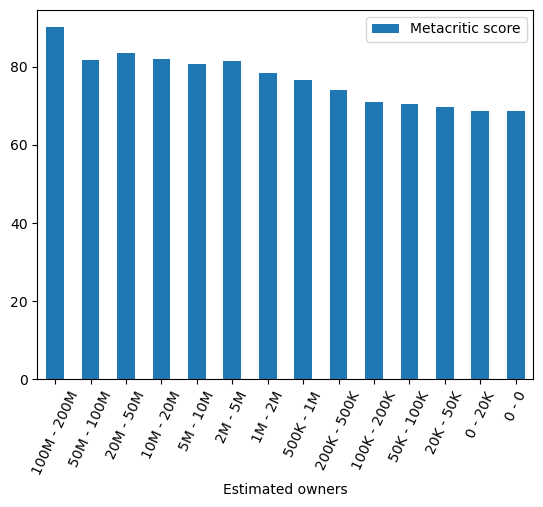

In [111]:
owner_scores_df.plot(kind='bar',y="Metacritic score")
plt.xticks(rotation=65)
plt.show()

In [70]:
play = top_scores_df['Average playtime two weeks']
score = top_scores_df['Metacritic score']
correlation = stats.pearsonr(play, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.09


In [69]:
price = top_scores_df['Price']
score = top_scores_df['Metacritic score']
correlation = stats.pearsonr(price, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.2


In [71]:
pos = top_scores_df['Positive']
score = top_scores_df['Metacritic score']
correlation = stats.pearsonr(pos, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.11


In [72]:
peak = top_scores_df['Peak CCU']
score = top_scores_df['Metacritic score']
correlation = stats.pearsonr(peak, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.07


In [74]:
steam_actual_tags_onehot_df = top_scores_df['Tags'].str.split(",").str.join('|').str.get_dummies()
big_tag_df = top_scores_df.join(steam_actual_tags_onehot_df)

In [76]:
sum_df = steam_actual_tags_onehot_df.sum().sort_values(ascending=False)
sum_df.head(10)

Singleplayer        2773
Action              2221
Adventure           2142
Indie               2001
Atmospheric         1392
Great Soundtrack    1280
Story Rich          1206
Multiplayer         1187
Strategy            1111
RPG                  976
dtype: int64

In [80]:
sing_tag_df = big_tag_df.groupby(["Singleplayer"])\
["Metacritic score"].mean().sort_values(ascending=False)
act_tag_df = big_tag_df.groupby(["Action"])\
["Metacritic score"].mean().sort_values(ascending=False)
adv_tag_df = big_tag_df.groupby(["Adventure"])\
["Metacritic score"].mean().sort_values(ascending=False)
ind_tag_df = big_tag_df.groupby(["Indie"])\
["Metacritic score"].mean().sort_values(ascending=False)



print(sing_tag_df)
print(act_tag_df)
print(adv_tag_df)
print(ind_tag_df)

Singleplayer
1    74.248467
0    68.782609
Name: Metacritic score, dtype: float64
Action
1    72.919856
0    72.598465
Name: Metacritic score, dtype: float64
Adventure
1    73.429972
0    71.948874
Name: Metacritic score, dtype: float64
Indie
0    73.759529
1    71.920040
Name: Metacritic score, dtype: float64


In [89]:
tag = big_tag_df['Singleplayer']
score = big_tag_df['Metacritic score']
correlation = stats.pearsonr(tag, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.23
